# Методология машинного обучения

В прошлой лекции мы обсуждали, какие задачи стоят перед специалистами в области машинного обучения. Вне зависимости от класса решаемой задачи и метода ее решения существует набор правил, методов и подходов, которыми пользуются все специалисты в области машинного обучения и науки о данных. Сегодняшняя лекция будет посвящена обсуждению таких методик, которыми мы будем пользоваться вплоть до окончания нашего курса, а те из вас, кто решит продолжить обучение машинному обучению и нейронным сетям, - и в дальнейшем.

Итак, в контексте сегодняшней лекции мы будем считать, что у нас в руках есть не только набор данных $X$, набор меток $y$ и постановка задачи, но и некоторый алгоритм $A$, который мы умеем **обучать** (то есть подбирать параметры этого алгоритма так, чтобы алгоритм решал задачу достаточно качественно). На следующих лекциях мы будем уточнять, какими бывают такие алгоритмы, как эти алгоритмы обучать и как измерять их качество. Сегодня же обсудим, как убедиться в том, что алгоритм будет обучен корректно, а также познакомимся с некоторыми функциями из библиотеки `sklearn`.

机器学习方法

在上一讲中，我们讨论了机器学习专家面临的挑战。无论解决的问题类型和解决方法如何，机器学习和数据科学领域的所有专家都会使用一套规则、方法和途径。今天的讲座将专门讨论我们将在课程结束前使用的技术，以及对于那些决定继续学习机器学习和神经网络的人来说，更进一步的学习。

因此，在今天的讲座中，我们将假设我们手中不仅有一个数据集$X$、一组标签$y$和一个问题陈述，而且还有一个算法$A$，我们知道如何**训练**它（即选择该算法的参数，以便算法能够以足够的质量解决问题）。在接下来的讲座中，我们将阐明什么是这样的算法，如何训练这些算法，以及如何衡量它们的质量。今天我们将讨论如何确保算法得到正确训练，并熟悉“sklearn”库中的一些函数。

## Обучение алгоритма и оценка его качества

Работа с алгоритмами в машинном обучении строится в два этапа:

1. Обучение алгоритма
2. Проверка качества обученного алгоритма

В каком-то смысле, можно воспринимать работу по обучения алгоритма, как работу по обучению школьника некоторому предмету. Обучение алгоритма соответствует в рамках этого сравнения стандартным школьным урокам, на которых ученики решают задачи под наблюдением учителя и немедленно получают обратную связь, имея возможность скорректировать свои представления о верном способе решения задачи, если была допущена ошибка. Этап тестирования модели соотвествует контрольной работе, на которой ученик должен продемонстрировать полученные знания, при этом **(a)** *не имея доступа к правильным ответам* **(б)** *не имея доступа к обратной связи от учителя, а значит - не имея возможности скорректировать свою стратегию решения задачи.*

训练算法并评估其质量

机器学习算法的工作分为两个阶段：

1. 训练算法
2. 检查训练算法的质量

从某种意义上来说，你可以把教授算法的工作视为向学生教授一门学科的工作。与标准学校课程相比，算法的训练相对应，在标准学校课程中，学生在老师的监督下解决问题并立即得到反馈，如果犯了错误，他们就有机会纠正关于正确解决问题的方法的想法。模型测试阶段对应于学生必须展示其所获得的知识的测试，同时**(a)**无法获得正确答案* **(b)**无法获得老师的反馈，因此没有机会调整解决问题的策略。*

## Разбиение выборки на train и test.

Сразу оговоримся, что под выборкой в данном случае мы понимаем множество доступных для анализа объектов. По большому счёту, термины *выборка*, *датасет*, *набор данных* и т.п. в рамках нашего разговора являются взаимозаменяемыми синонимами за редкими исключениями, которые будут оговариваться отдельно.

В базовом случае мы разбиваем выборку на так называемые *тренировочную* и *тестовую* выборки. Это нужно для того, чтобы не ввести себя в заблуждение, оценивая качество работы алгоритма на тех же данных, что использовались при его обучении. **Оценка качества работы модели на тренировочной выборке не показательна**. Ведь наш алгоритм всегда мог подстроить свои параметры так, чтобы результат именно на этой тренировочной выборке будет хорошим, однако ни к каким другим данным его применить будет нельзя.

Логика такая же, как у учителей в школе: если дать ученику домашнюю работу, то он может подсмотреть ответы в конце учебника и просто их запомнить, не разобравшись в теме. Поэтому на контрольной работе необходимо дать задачи, которые будут отличаться от выданных ранее в качестве домашней работы. В данном случае, тренировочной выборкой выступает домашнее задание, его цель - натренировать ученика, научить его решать некоторый тип задач. А тестовая выборка - это контрольная работа. Домашнюю работу хорошо решить могут и плохой, и хороший ученики, а вот контрольную хорошо решит только хороший. Также и с разбиением на тренировочную и тестовую выборки.

将样本分成训练和测试。

让我们立即规定，在这种情况下，样本是指一组可供分析的对象。总的来说，术语“*样本*”、“数据集*”、“数据集*”等。在我们的对话框架内，除了极少数例外，其他同义词都可以互换，我们将对此进行单独讨论。

在基本情况下，我们将样本分为所谓的*训练*样本和*测试*样本。这样做是必要的，这样您就不会因为使用与训练时相同的数据来评估算法的工作质量而误导自己。 **对模型在训练样本上的性能质量的评估不具有指示性**。毕竟，我们的算法总是可以调整其参数，以便在这个特定的训练样本上取得良好的结果，但不可能将其应用于任何其他数据。

这与学校里老师的逻辑是一样的：如果你给学生布置作业，他可以看看课本后面的答案，然后简单地记住答案，而无需理解主题。因此，在考试中需要布置与之前家庭作业不同的任务。在这种情况下，训练样本就是家庭作业，它的目的是训练学生，教他解决某一类问题。并且测试样本是一个控制任务。好学生和坏学生都可以很好地完成作业，但只有好学生才能很好地参加考试。分成训练样本和测试样本也是同样的道理。

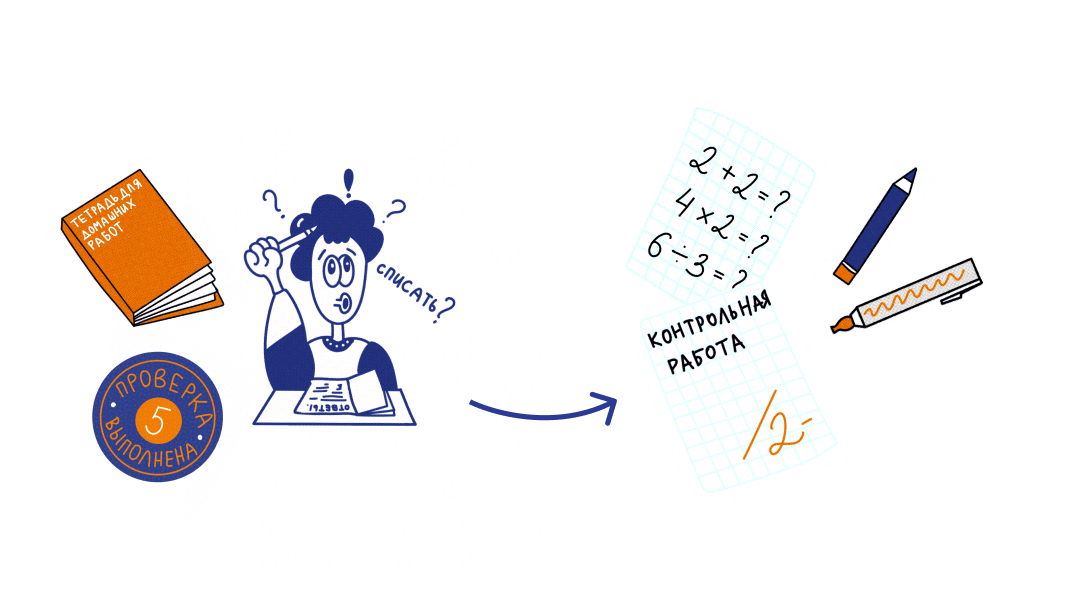

Специально для разделения выборок на тренировочную и тестовую в `sklearn` реализована функция ```sklearn.model_selection.train_test_split```:

在 `sklearn` 中，函数 ```sklearn.model_selection.train_test_split``` 是专门为了将样本划分为训练集和测试集而实现的：

In [1]:
from sklearn.model_selection import train_test_split

Для примера сгенерируем выборку в виде круга на двумерной плоскости:

作为示例，我们在二维平面上生成一个圆形的样本：

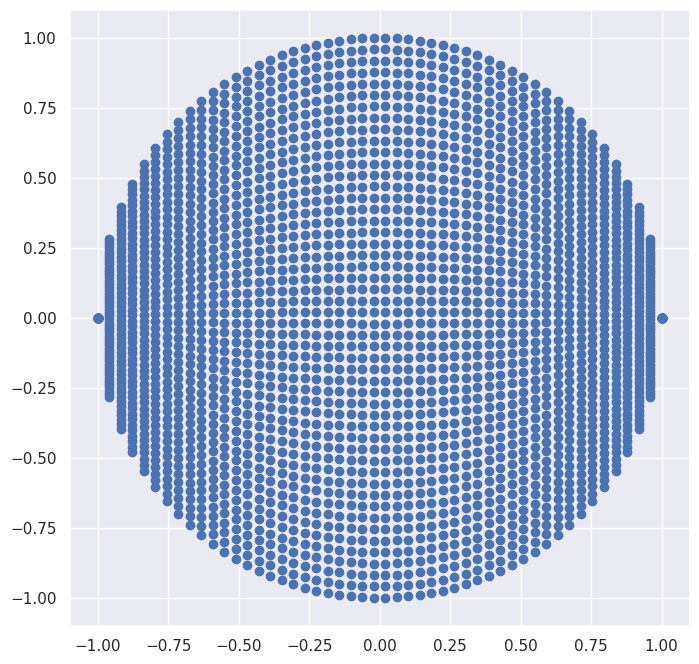

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

DATASET = []

for x in np.linspace(-1, 1, 50):
    for y in np.linspace(-np.sqrt(1 - x**2), np.sqrt(1 - x**2), 50):
        DATASET.append([x, y])

DATASET = np.array(DATASET)

plt.figure(figsize=(8, 8))
plt.scatter(DATASET[:, 0], DATASET[:, 1])

В качестве метки присвоим каждой точке сумму её координат:

作为标签，我们为每个点分配其坐标的总和：

In [3]:
y = np.sum(DATASET, axis=-1)

Пусть мы хотим разбить эту выборку на тренировочную и тестовую в пропорции 3:1. Тогда ровно 0.25 объектов нашей выборки должны отправиться в тестовую выборку. Причем мы хотим, чтобы набор меток $y$ также корректно разделился на тестовый и тренировочный набор, согласно тому, как были разделены объекты.

Воспользуемся для этого функцией ```train_test_split```

假设我们想按照 3:1 的比例将该样本分为训练和测试。那么我们样本中的 0.25 个对象应该作为测试样本。此外，我们希望标签集合$y$也能根据对象的划分方式正确地划分为测试集和训练集。

让我们为此使用“train_test_split”函数。

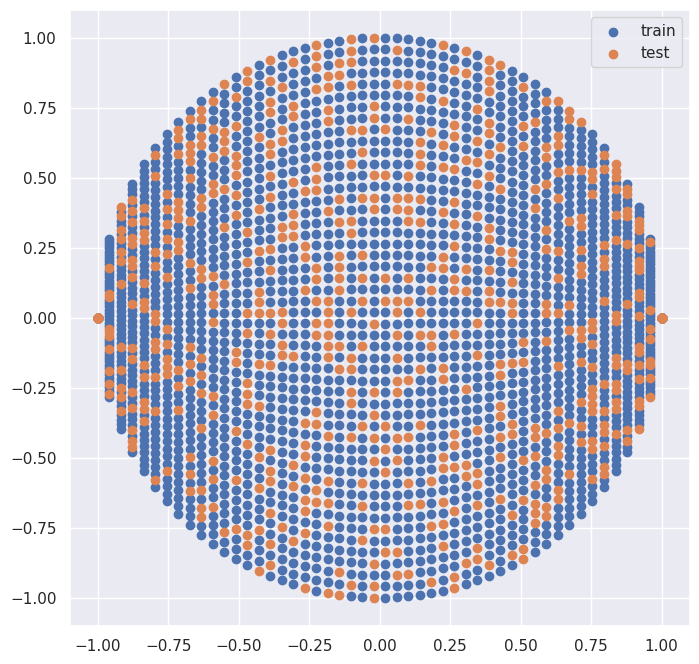

In [4]:
X_train, X_test, y_train, y_test = train_test_split(DATASET, y, test_size=0.25)
plt.figure(figsize=(8, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], label="train")
plt.scatter(X_test[:, 0], X_test[:, 1], label="test")
plt.legend()

Как мы видим, точки датасета были распределены между `train` и `test` в случайном порядке. Эта случайность бывает необходима для того, чтобы гарантировать *репрезентативность* полученных выборок (то есть отличие некоторых свойств, наблюдаемых в конкретной выборке, от тех же свойств, наблюдаемых в целом). Чтобы пояснить эту идею, рассмотрим такой пример:

Пусть вы хотите обучить модель, отличающую розы от тюльпанов по фотографии. Вы попросили друзей-биологов из ботанического сада собрать для вас небольшую выборку фотографий этих цветов. Друзья, не зная ничего о тонкостях обучения моделей ML, поступили следующим образом: сначала cфотографировали 75 образцов тюльпанов, а лишь затем 25 образцов роз, пронумеровали полученные фотографии от 1 до 100 по мере их получения и отдали вам в таком виде. Что теперь будет, если вы разделите выборку на тренировочную и тестовую в соотношении 2:1, не перемешав её? Ваш алгоритм решит, что все цветы в мире - это тюльпаны, ведь все поданные ему на вход данные содержали метку "тюльпан".

我们可以看到，数据集点在“训练”和“测试”之间随机分布。这种随机性有时是必要的，以确保获得的样本具有*代表性*（即，在特定样本中观察到的某些属性与一般观察到的相同属性不同）。为了阐明这个想法，请考虑以下示例：

假设您想要训练一个模型来从照片中区分玫瑰和郁金香。您请植物园的生物学家朋友为您收集一些这些花的照片。朋友们对训练 ML 模型的复杂性一无所知，他们做了以下事情：首先，他们拍摄了 75 张郁金香样本，然后拍摄了 25 张玫瑰样本，将收到的照片从 1 编号到 100，然后以这种形式交给您。如果将样本以 2:1 的比例分成训练和测试而不进行混合，会发生什么情况？您的算法将判定世界上所有的花都是郁金香，因为输入的所有数据都包含“郁金香”标签。

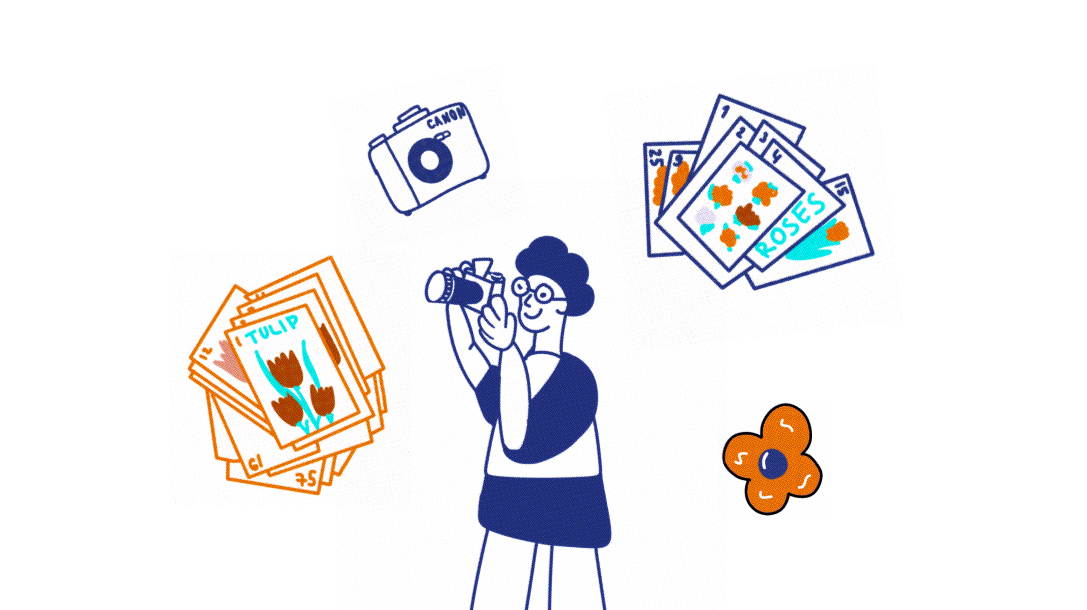

Это лишь самый простой пример, в действительности скрытые зависимости в данных бывают и намного более сложными. Поэтому почти всегда необходимо перемешивать выборку.

Но в связи с этим возникают и свои проблемы. Понятно, что результат оценки качества модели зависит от способа разбиения выборки на `train` и `test`. В хорошем случае эта зависимость крайне слаба, и в целом неважно, какие конкретно объекты попадут в `train`, а какие - в `test`. Но, к сожалению, обычно эта зависимость всё же ощутима. Если кто-то решит воспроизвести полученный вами результат на своём собственном компьютере, его результат может быть отличен от вашего из-за элемента случайности, внесённого перемешиванием выборки.

Более того, часто различные случайные структуры присутствуют и в самих алгоритмах ML. Нам с вами еще предстоит изучить такие алгоритмы, как `Random Forest`, `Neural Networks`, `Decision Trees` и многие другие. Все они в той или иной мере используют различные элементы случайности при обработке данных. Совокупный эффект от всех этих структур может накопиться и сделать воспроизведение ваших результатов совершенно невозможным!

С этим можно бороться довольно просто.
Дело в том, что случайные числа, генерируемые компьютером, в реальности **не случайны**. Существует алгоритм, по которому можно однозначно восстановить все сгенерированные случайные значения. Именно по этой причине такие числа обычно называют **псевдослучайными**. Но всё не так просто: в основе этого алгоритма лежит некоторое заранее заданное число, которое обычно называют **`random_seed`** (иногда иначе, например, часто его называют `random_state`). Это своеобразный ключ доступа к сгенерированным псевдослучайным числам. В базовом случае это число стараются взять как можно более случайным. Например, берут текущее тактовое время процессора - эту величину очень сложно предугадать. В реальности именно `random_seed` является в классическом понимании случайным числом, ведь никто и никогда заранее не угадает сколько времени вы потратите на перерыв на чай, прежде чем нажмёте кнопку выполнения алгоритма, и `random_seed` будет взят из процессора как текущее значение некоторой переменной. **Но, зная `random_seed`, можно однозначно восстановить все случайные величины, которые были использованы в вашей работе!**

Именно по этой причине это значение часто задают самостоятельно.
Так вышло, что многие программисты стараются использовать число 42 в качестве `random_seed`. Это всего лишь традиция, здесь не стоит искать какого-то глубокого смысла.

По этой причине всегда рекомендуется перед началом работы прописывать строчку инициализации `random_seed`, а также во всех алгоритмах, где это возможно, самостоятельно прописывать значение `random_state`.

这只是最简单的例子；实际上，数据中隐藏的依赖关系可能要复杂得多。因此，几乎总是需要对样本进行打乱。

但这也带来了自身的问题。显然，评估模型质量的结果取决于将样本划分为“训练”和“测试”的方法。在好的情况下，这种依赖性非常弱，并且一般来说，哪些特定对象最终进入“训练”、哪些进入“测试”并不重要。但不幸的是，这种依赖通常仍然是显而易见的。如果有人决定在自己的计算机上重现您所获得的结果，那么由于样本混洗引入了随机元素，他们的结果可能会与您的结果不同。

此外，ML 算法本身通常存在各种随机结构。我们还需要研究诸如“随机森林”、“神经网络”、“决策树”等算法。它们都在数据处理中不同程度地利用了各种随机元素。所有这些结构的综合效应会累积起来，使得完全不可能重现您的结果！

这可以很简单地处理。
问题是，计算机生成的随机数实际上并不是**随机的**。有一种算法，可以唯一地恢复所有生成的随机值。正是由于这个原因，这样的数字通常被称为**伪随机**。但其实并没有那么简单：这个算法是基于某个预先设定的数字的，这个数字通常被称为**`random_seed`**（有时候也不同，比如，它常被称为`random_state`）。这是一种生成的伪随机数的访问密钥。在基本情况下，他们会尝试让这个数字尽可能的随机。例如，他们采用处理器的当前时钟时间——这个值很难预测。实际上，`random_seed` 是一个传统意义上的随机数，因为没有人会提前猜到在你按下按钮执行算法之前你会花多少时间在茶歇上，而 `random_seed` 将从处理器中取出作为某个变量的当前值。 **但是，知道了`random_seed`，你就可以毫无疑问地恢复你在工作中使用的所有随机值！**

正是由于这个原因，这个值通常是单独设置的。
碰巧的是，许多程序员尝试使用数字 42 作为“random_seed”。这只是一种传统，没必要在这里寻找什么深层含义。

因此，始终建议在开始工作之前编写初始化行“random_seed”，并且在所有算法中，如果可能，自己写入“random_state”的值。

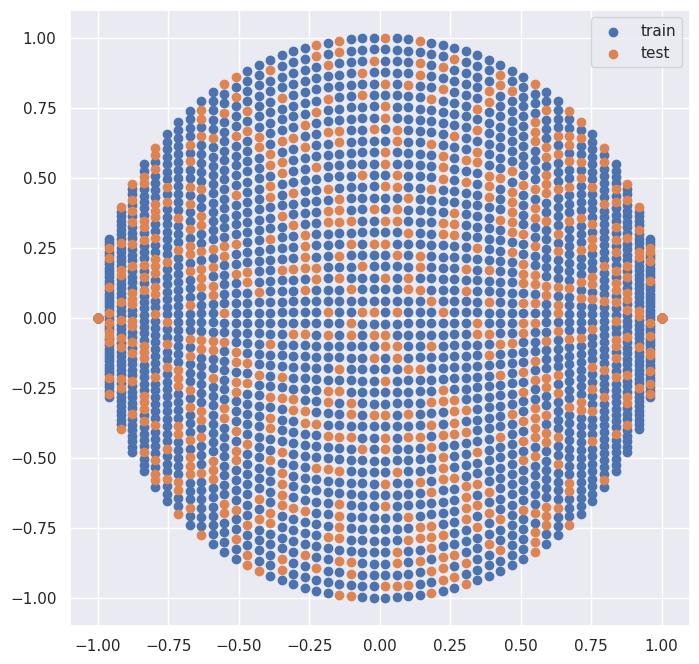

In [5]:
# 为 np.random 模块设置种子的行
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(
    DATASET, y, test_size=0.25, random_state=42
)
plt.figure(figsize=(8, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], label="train")
plt.scatter(X_test[:, 0], X_test[:, 1], label="test")
plt.legend()

Убедимся в том, что одинаковый `random_state` даст нам один и тот же результат, а разные `random_state` - разные:

让我们确保相同的“random_state”会给我们相同的结果，而不同的“random_state”会给我们不同的结果：

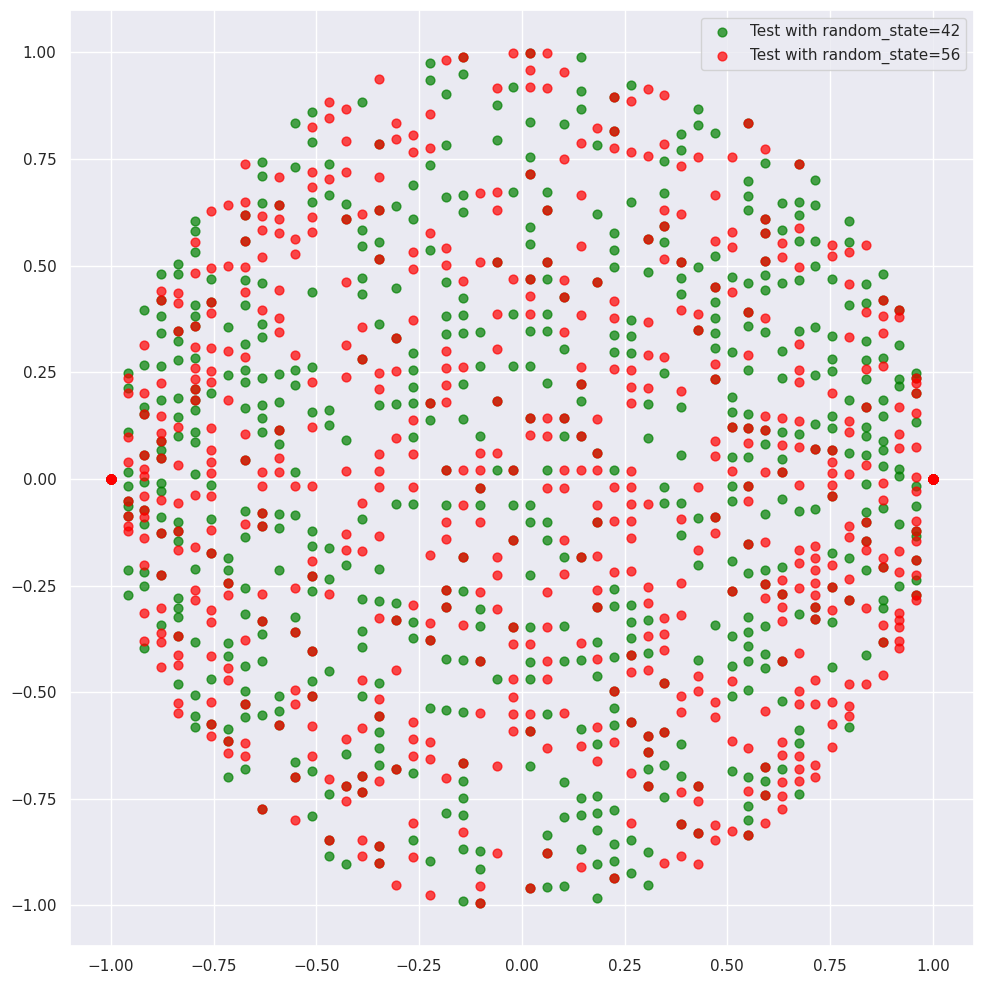

In [6]:
X_train, X_test_1, y_train, y_test_1 = train_test_split(
    DATASET, y, test_size=0.25, random_state=42
)
X_train, X_test_2, y_train, y_test_2 = train_test_split(
    DATASET, y, test_size=0.25, random_state=56
)
plt.figure(figsize=(10, 10))
plt.scatter(
    X_test_1[:, 0], X_test_1[:, 1],
    label="Test with random_state=42",
    color="green",
    alpha=0.7,
    s=40
)
plt.scatter(
    X_test_2[:, 0], X_test_2[:, 1],
    label="Test with random_state=56",
    color="red",
    alpha=0.7,
    s=40
)
plt.legend()
plt.tight_layout()


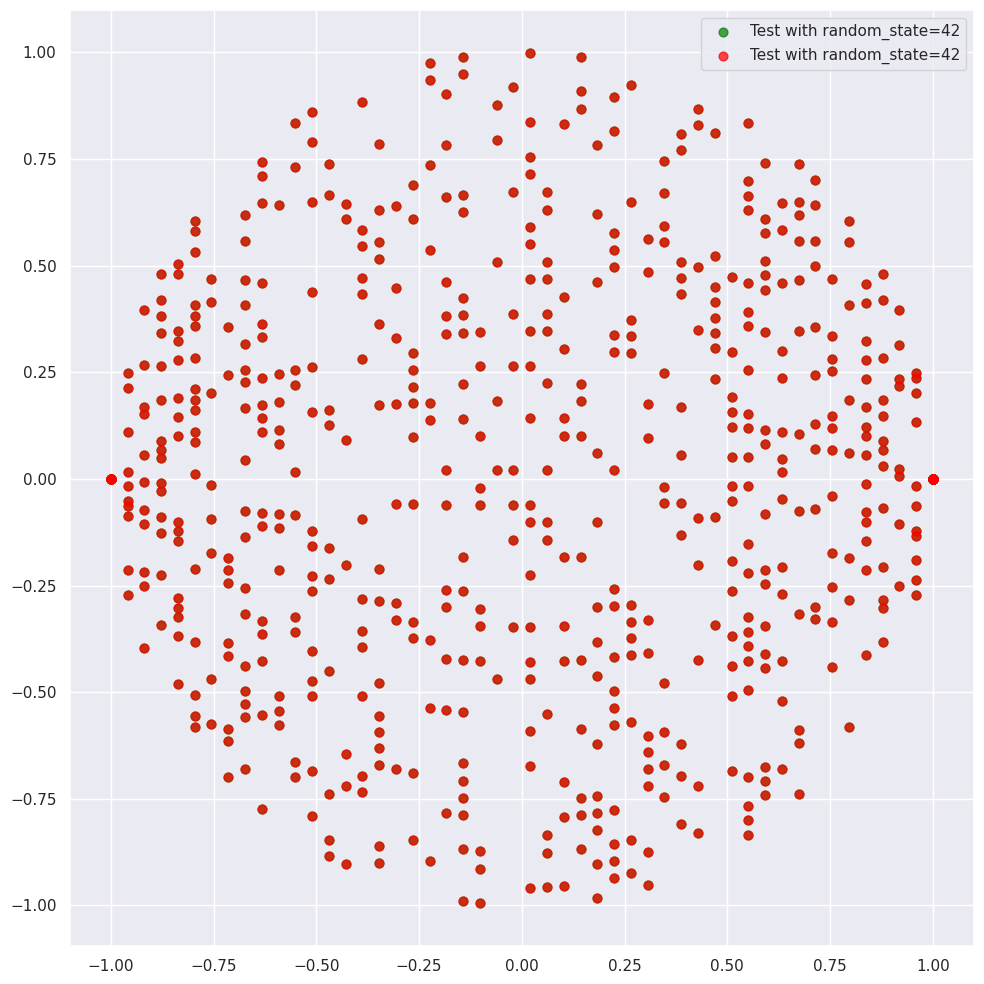

In [8]:
X_train, X_test_1, y_train, y_test_1 = train_test_split(
    DATASET, y, test_size=0.25, random_state=42
)
X_train, X_test_2, y_train, y_test_2 = train_test_split(
    DATASET, y, test_size=0.25, random_state=42
)
plt.figure(figsize=(10, 10))
plt.scatter(
    X_test_1[:, 0], X_test_1[:, 1],
    label="Test with random_state=42", color="green", alpha=0.7, s=40
)
plt.scatter(
    X_test_2[:, 0], X_test_2[:, 1],
    label="Test with random_state=42", color="red", alpha=0.7, s=40
)
plt.legend()
plt.tight_layout()


Они полностью наложились друг на друга, именно этого мы и добивались.

Бывают ли ситуации, когда делать перемешивание выборки вредно?
Бывают. Иногда сама структура данных предполагает связь между соседними элементами. Например, во многих задачах связанных с временными рядами необходимо сохранить исходную последовательность данных.

В этом случае мы можем установить значение аргумента `shuffle` функции `train_test_split` в позицию `False`

它们完全重叠，这正是我们想要实现的。

在哪些情况下，对样本进行混洗是有害的？
它们确实发生了。有时数据结构本身暗示相邻元素之间的关系。例如，在许多时间序列问题中，需要保留数据的原始序列。

在这种情况下，我们可以将“train_test_split”函数的“shuffle”参数的值设置为“False”

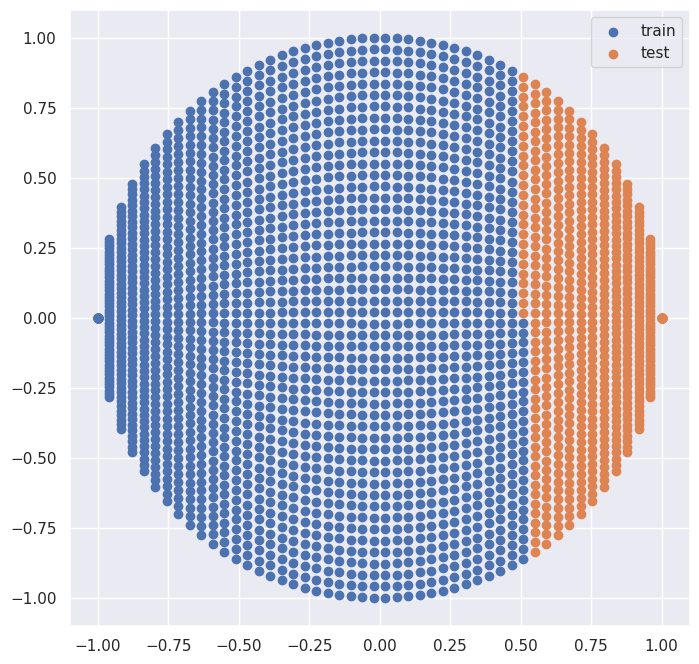

In [9]:
X_train, x_test, y_train, y_test = train_test_split(
    DATASET, y, test_size=0.25, shuffle=False
)
plt.figure(figsize=(8, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], label="train")
plt.scatter(x_test[:, 0], x_test[:, 1], label="test")
plt.legend()

#### Стратификация

При разбиении выборки на тренировочную и тестовую необходимо следить за тем, чтобы эти выборки были как можно больше похожи друг на друга. К критериям такой похожести относится, например, сохранение основных выборочных параметров всех признаков и целевой переменной (математического ожидания, стандартного отклонения и т.п.). Очень частым примером ошибки, которую можно допустить при разбиении выборки на train и test, является **изменение соотношения классов** в целевой переменной при решении задачи классификации. Довольно часто выборки бывают *дисбалансными*, то есть соотношение классов в них неравное. Например, всего 5% объектов в датасете может принадлежать классу $1$, в то время как целых 95% принадлежит классу $0$. В этом случае случайное разбиение выборки на train и test может привести к тому, что соотношение классов в тренировочной и тестовой выборках будет очень сильно отличаться, как в примере ниже.

分层

将样本分成训练样本和测试样本时，必须注意确保这些样本尽可能彼此相似。这种相似性的标准包括，例如，保留所有特征的主要样本参数和目标变量（数学期望、标准差等）。将样本分成训练和测试时可能犯的一个非常常见的错误示例是在解决分类问题时**改变目标变量中的类别比例**。样本经常是不平衡的，也就是说，样本中类别的比例是不相等的。例如，数据集中只有 5% 的对象可能属于类 $1$，而多达 95% 的对象属于类 $0$。在这种情况下，将样本随机分成训练和测试可能会导致训练和测试样本中的类别比例非常不同，如下例所示。

In [10]:
np.random.seed(42)

# 让我们定义合成类标签，其比例约为 5% - 95%
Y_full = np.random.choice([0, 1], size=[100], p=[0.95, 0.05])
print((Y_full == 1).sum())

5


А теперь проверим, что будет с соотношением меток в тренировочной и тестовой выборках при разбиении такой выборки в соотношении 4:1

现在让我们检查一下，当以 4:1 的比例分割此类样本时，训练和测试样本中的标签比例会发生什么变化

In [11]:
y_train, y_test = train_test_split(Y_full, test_size=0.2, random_state=42)
print((y_train == 1).sum())

5


Все объекты класса 1 попали в тренировочную выборку. То есть соотношение классов в тренировочной выборке теперь $6.25$% против $93.75$%, а в тестовой - $0$% против $100$%. Заметное отличие.

Эту проблему можно решить при помощи метода **стратификации**. Это метод, позволяющий сохранить распределение классов в обеих выборках одинаковым. В `sklearn` существует возможность активации этого метода при использовании функции `train_test_split`. Для этого нужно передать вектор меток с исходным распределением в качестве аргумента `stratify` этой функции.

所有第 1 类的对象都包含在训练集中。也就是说，训练样本中的类别比例现在是 6.25% 对 93.75%，测试样本中的类别比例现在是 0% 对 100%。明显的区别。

这个问题可以用**分层**方法来解决。这是一种使两个样本中的类别分布保持相同的方法。在`sklearn`中，使用`train_test_split`函数时有一个选项可以激活此方法。为此，将具有原始分布的标签向量作为“分层”参数传递给此函数。

In [12]:
y_train, y_test = train_test_split(Y_full, test_size=0.2, random_state=42, stratify=Y_full)
print((y_train == 1).sum())

4


При использовании стратификации можно не опасаться, что тренировочная и тестовая выборки окажутся "сдвинутыми" относительно исходного распределения целевой переменной, что делает их более репрезентативными.

使用分层时，不必担心训练和测试样本会相对于目标变量的原始分布发生“偏移”，从而使它们更具有代表性。

____________________________________

**Замечание:** иногда на практике выборки разбивают не на две части, а на три. Третья часть в этом случае называется **валидационной**. Это делается по двум причинам:

>1. Некоторые алгоритмы машинного и глубинного обучения могут учиться достаточно долго и бывает очень полезно отслеживать как изменяется качество алгоритма во время его обучения. В этом случае валидационная выборка используется для оценки качества во время обучения модели и составления промежуточных выводов о том, как обучается алгоритм. Валидационная выборка также "не показывается" алгоритму, она имитирует тестовую.

>2. Для большинства алгоритмов машинного обучения существует проблема подбора **гиперпараметров**, то есть параметров алгоритма, которые не могут быть определены автоматически, требуют ручного экспертного подбора. Подбор гиперпараметров - это тоже своеобразное обучение алгоритма, поскольку они могут достаточно сильно влиять на качество. Валидационная выборка в этом случае представляет из себя что-то вроде тренировочной выборки, но для подбора гиперпараметров. То есть по качеству алгоритма на валидационной выборке выбираются гиперпараметры модели, но затем модель всё еще необходимо протестировать целиком - с учетом подобранных вручную гиперпараметров и параметров, подобранных автоматически.

Вообще разбиение выборки на три части вместо двух в основном характерно для работы с нейронными сетями и в нашем курсе встречаться почти не будет.

**注意：**有时在实践中样本不是分成两部分，而是分成三部分。在这种情况下，第三部分称为**验证**。这样做有两个原因：

>1.一些机器和深度学习算法可能需要相当长的时间来学习，并且跟踪算法在学习过程中质量的变化非常有用。在这种情况下，验证集用于评估模型训练期间的质量并得出有关算法如何学习的中间结论。验证样本对算法来说也是“未显示”的；它模仿测试样本。

>2.对于大多数机器学习算法来说，都存在**超参数**的选择问题，即算法参数无法自动确定，需要专家手动选择。选择超参数也是算法的一种训练，因为它们会对质量产生重大影响。在这种情况下，验证样本类似于训练样本，但用于选择超参数。也就是说，根据算法的质量，在验证样本上选择模型超参数，但随后仍需要对模型进行整体测试——同时考虑手动选择的超参数和自动选择的参数。

一般来说，将样本分成三部分而不是两部分主要是神经网络工作的典型做法，在我们的课程中几乎不会遇到。

А теперь представим себе маловероятную, но все же далеко не фантастическую ситуацию. Плохой ученик абсолютно случайно хорошо написал контрольную работу, совершнно не разбираясь в теме. Тест мог оказаться слишком лёгким даже по меркам двоечников, или же ответы могли быть банально угаданы. В жизни всякое бывает. И в статистике тоже. Тестовая выборка, которую мы сформируем для нашего алгоритма может оказаться не слишком показательной, "сдвинутой" или же просто хорошо подойдёт для какого-то конкретного алгоритма по чистой случайности.  Это приводит нас к мысли о том, что по-хорошему нужно использовать целый набор тестовых выборок для более точной оценки алгоритма. Один из методов, позволяющих осуществить такую оценку, - это **метод кросс-валидации**.

现在让我们想象一个不太可能发生但还远非理想的情况。一个差劲的学生完全是在对题目没有任何理解的情况下，偶然写出了一张好试卷。即使按照贫困学生的标准来看，考试也可能太简单了，或者答案可能只是猜测而已。生活中任何事情都有可能发生。在统计学上也是如此。我们为算法形成的测试样本可能不是很有代表性，可能有“偏差”，或者可能只是偶然适合某个特定的算法。 这让我们想到，使用一整套测试样本来更准确地评估算法是一个好主意。允许进行此类评估的方法之一是**交叉验证方法**。

## Метод кросс-валидации

Чтобы оценить качество нашей модели воспользуемся таким **методом cross-validation** (*перекрёстная проверка, кросс-проверка, скользящий контроль*, *перекрёстная валидация*) — метод оценки аналитической модели и её поведения на независимых данных. При оценке модели имеющиеся в наличии данные разбиваются на $n$ частей (это число выбираем мы). Затем на $n$−1 частях данных производится обучение модели, а оставшаяся часть данных используется для тестирования. Процедура повторяется $n$ раз. В итоге каждая из $n$ частей данных используется для тестирования. В результате получается оценка эффективности выбранной модели с наиболее равномерным использованием имеющихся данных.

交叉验证方法

为了评估我们模型的质量，我们将使用**交叉验证方法**（*交叉检查，交叉验证，交叉验证*，*交叉验证*）——一种评估分析模型及其在独立数据上的行为的方法。在评估模型时，可用数据被分成$n$个部分（我们选择这个数字）。然后基于数据的 $n$−1 部分对模型进行训练，并使用数据的剩余部分进行测试。该过程重复$n$次。因此，$n$条数据中的每一条都用于测试。结果是对所选模型的有效性的评估，并且最统一地使用了可用数据。

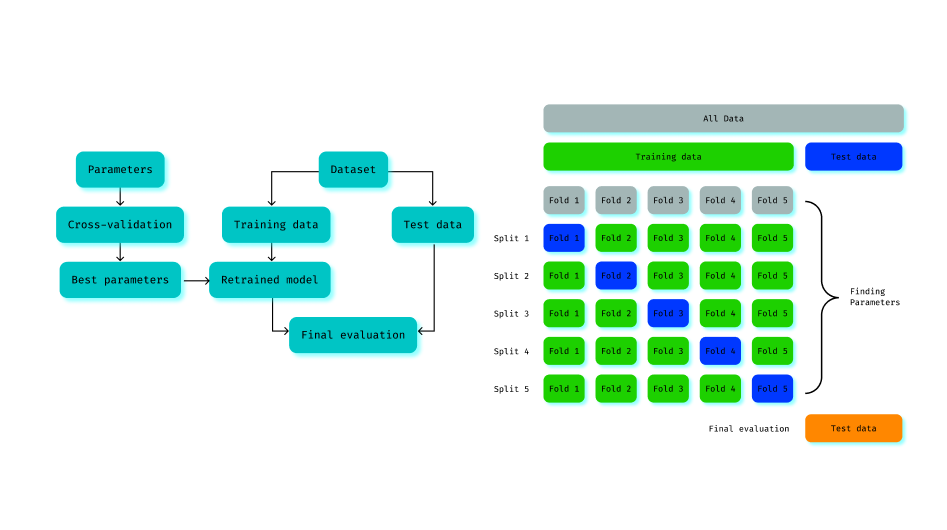

# Интерфейс sklearn

В будущем мы будем регулярно пользоваться известной библиотекой машинного обучения `sklearn`. Эта библиотека была разработана специально для работы с широким набором инструментов классического машинного обучения. `sklearn` - очень динамичный, постоянно развивающийся фреймворк, задавший стандарты для всего open-source сообщества в мире анализа данных. Одним из достижений `sklearn` является стандартизация и популяризация удобного интерфейса работы с моделями. Мы разберемся в основных универсальных элементах этого интерфейса, знание которых позволит вам довольно просто пользоваться всем инструментарием `sklearn`.

sklearn 接口

未来我们将会定期使用著名的机器学习库“sklearn”。该库专门设计用于与各种经典机器学习工具配合使用。 `sklearn` 是一个非常有活力、不断发展的框架，为数据分析领域的整个开源社区设定了标准。 `sklearn` 的成就之一是标准化和普及了使用模型的便捷界面。我们将研究该界面的主要通用元素，了解这些元素将使您能够轻松使用所有“sklearn”工具。

## Алгоритмы

Библиотека `sklearn` собрала множество алгоритмов ML разной природы. Эти алгоритмы распределены по модулям, среди которых нас будут интересовать прежде всего:
* `sklearn.linear_model`
* `sklearn.tree`
* `sklearn.svm`
* `sklearn.ensemble`
* `sklearn.cluster`
* `sklearn.neighbors`

Все алгоритмы, представленные в этих модулях, за редкими исключениями, имеют две ключевые функции, отвечающие запуску процессу обучения и предсказания соответственно.



算法

`sklearn`库收集了许多不同性质的ML算法。这些算法分为几个模块，其中我们主要感兴趣的是：
*`sklearn.linear_model`
*`sklearn.tree`
*`sklearn.svm`
*`sklearn.ensemble`
*`sklearn.cluster`
*`sklearn.邻居`

这些模块中介绍的所有算法，除少数例外，都有两个关键功能，分别对应于启动学习和预测过程。

### Обучение модели

Обучение модели в `sklearn` производится посредством вызова функции `.fit(X, y)` для алгоритмов supervised learning и `.fit(X)` для алгоритмов unsupervised learning. Функция `.fit` - это метод класса алгоритма, вызов которой производит подбор оптимальных параметров алгоритма, основываясь на матрице признаков объектов датасета `X` и, в случае обучения с учителем, векторе верных ответов `y`.

Приведём пример. В данном случае совершенно неважно, какой конкретно алгоритм применяется для решения задачи. Мы хотим лишь продемонстрировать общую схему работы с алгоритмом. Прежде всего мы сгенерируем датасет.

模型训练

在 `sklearn` 中训练模型是通过调用 `.fit(X, y)`（对于监督学习算法）和 `.fit(X)`（对于无监督学习算法）来完成的。 `.fit` 函数是算法类的一种方法，当调用时，它会根据数据集对象 `X` 的特征矩阵以及在监督学习的情况下的正确答案向量 `y` 来选择算法的最佳参数。

让我们举个例子。在这种情况下，使用哪种具体算法来解决问题根本不重要。我们只是想演示该算法的一般工作方案。首先，我们将生成一个数据集。

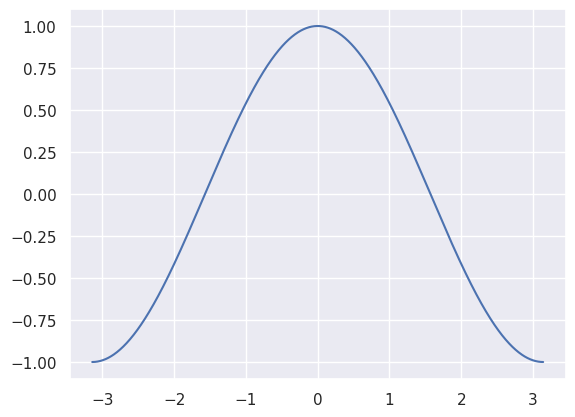

In [13]:
X = np.linspace(-np.pi, np.pi, 1000).reshape(-1, 1)
y = np.cos(X)

plt.plot(X, y)

In [14]:
# 将样本分为训练集和测试集
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [15]:
# 让我们从 sklearn.ensemble 模块中选择一些算法
from sklearn.ensemble import RandomForestRegressor

# 创建导入类的对象
regressor = RandomForestRegressor()

# 让我们通过调用 .fit() 函数来训练它
regressor.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

### Применение модели

Для составления прогноза на данных, которые модель "не видела" при обучении, используется функция `.predict(X)`. Вызов этой функции позволяет получить предсказания для каждого из объектов матрицы `X`. Эта функция актуальна для алгоритмов supervised learning.

模型的应用

为了对模型在训练期间“未看到”的数据进行预测，使用了 `.predict(X)` 函数。调用此函数可以让您获得矩阵“X”中每个对象的预测。此功能与监督学习算法相关。

In [16]:
# 让我们对测试样本进行算法的预测

y_pred = regressor.predict(x_test)

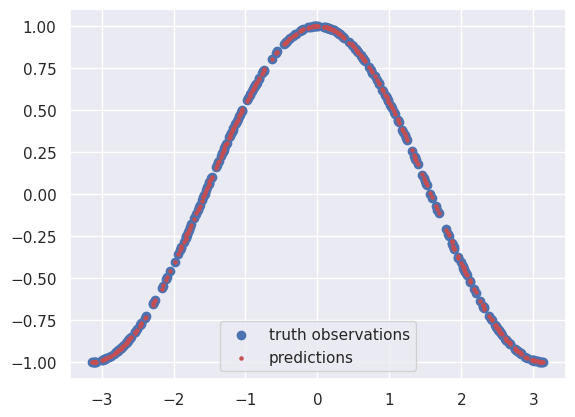

In [17]:
plt.scatter(x_test, y_test, label='truth observations');
plt.scatter(x_test, y_pred, s=5, c='r', label='predictions');
plt.legend()
plt.show();

### Оценка качества

В `sklearn` существует широкий арсенал метрик качества моделей классификации и регрессии. Он реализован в модуле `sklearn.metrics`. Мы разберёмся с этими метриками в процессе нашего курса, но сегодня я хочу обратить ваше внимание на простой способ измерения качества модели - использование функции `.score(X, y)`. Эта функция вызывает процесс прогноза модели для датасета `X` и сравнивает получившийся прогноз с истинными метками `y`, применяя одну из двух функций:
* accuracy (доля правильных ответов), если речь идёт о задаче классификации
* $R^2$ (коэффициент детерминации), если речь идёт о задаче регрессии (эту метрику мы подробно обсудим на одной из будущих лекций)

质量评估

`sklearn` 对分类和回归模型的质量有广泛的衡量指标。它在“sklearn.metrics”模块中实现。我们将在课程中介绍这些指标，但今天我想指出一种衡量模型质量的简单方法——使用 `.score(X, y)` 函数。该函数调用模型对数据集“X”的预测过程，并使用以下两个函数之一将结果预测与真实标签“y”进行比较：
* 准确度（正确答案的比例），如果我们谈论的是分类任务
* 如果我们讨论的是回归问题，则为 $R^2$（判定系数）（我们将在未来的某节课中详细讨论这个指标）

In [18]:
regressor.score(x_test, y_test)

0.9999782907844347

## Предобработка данных

В течение нашего курса мы убедимся, что для разных алгоритмов ML требуются разные способы предобработки данных. К таким способам может относиться приведение признаков к единой шкале, расшифровка категориальных признаков, нормировка, преобразование текстовых признаков и многие другие. Для работы с такими механизмами создан отдельный модуль, также придерживающйся правил интерфейса. Методы предобработчиков (трансформеров) мало отличаются от методов алгоритмов, за тем исключением, что функция `predict`, позволяющая алгоритмам осуществлять предсказания, заменяется  на функцию `transform`, позволяющую предобработчикам преобразовывать данные. Приведём пример наиболее популярного предобработчика.

数据预处理

在我们的课程中，我们将看到不同的 ML 算法需要不同的数据预处理方法。这些方法可能包括将特征减少到单一尺度、解码分类特征、规范化、文本特征的转换等等。为了与这些机制协同工作，我们创建了一个单独的模块，它也遵守接口规则。预处理器（转换器）方法与算法方法差别不大，只是允许算法进行预测的“预测”函数被允许预处理器转换数据的“转换”函数所取代。让我们举一个最流行的预处理器的例子。

### Standard Scaling

Standard Scaling - это общепринятая в статистике процедура нормализации [выборки](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=yPmqiNmzddfC):

$$\hat{x} = \frac{x - μ}{σ}$$

Где $μ = E[x]$ - [математическое ожидание](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=WFWnaX2VjmSc), которое обычно заменяется просто выборочной оценкой (среднему значению $x$ по датасету), а $σ$ соответственно - [стандартное отклонение](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=iIg2ARx8qfdJ), которое также обычно вычисляется по датасету.

Сделать это можно при помощи соответственно `np.mean()` и `np.std()`.

Теперь мы довольно просто можем написать функцию `scale`:

标准缩放

标准缩放是用于规范化[样本](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=yPmqiNmzddfC)的标准统计程序：

$$\hat{x} = \frac{x - μ}{σ}$$

其中 $μ = E[x]$ 是 [数学期望](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=WFWnaX2VjmSc)，通常用简单样本估计值（数据集中 $x$ 的平均值）代替，$σ$ 是 [标准差](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=iIg2ARx8qfdJ)，通常也是通过数据集计算的。

这可以分别使用“np.mean()”和“np.std()”来完成。

现在我们可以很简单地编写“scale”函数：

In [19]:
def scale(X):
    """
 数据集中的缩放特征。

 参数：
 X（类似数组）：输入数据数组。

 返回：
 类似数组：缩放的特征值​​。
    """
    x_mean = X.mean(axis=0)
    x_std  = X.std(axis=0)
    X_scaled = (X - x_mean)/x_std
    return X_scaled


Сгенерируем искусственную выборку и проверим, что все координаты действительно будут отмасштабированы.

让我们生成一个人工样本并检查所有坐标是否实际缩放。

In [20]:
scales = np.array([1, 0.1, 10])
x = np.random.randn(1000, 3) * scales.reshape(1, -1)
print(x)

[[ -0.19236096   0.03015473  -0.3471177 ]
 [ -1.16867804   0.11428228   7.51933033]
 [  0.79103195  -0.09093875  14.02794311]
 ...
 [  0.36141732  -0.12931415   5.72390311]
 [  0.45060341  -0.18698163 -11.61783844]
 [ -0.2831389   -0.03008597 -12.09476935]]


#### Violinplot
_________________________________________________________________

**Пояснение:** в этом разделе используется метод визуализации violinplot. Этот метод используется исключительно для визуальной демонстрации преобразований, которые совершаются при выполнении нормализации.

小提琴图
_________________________________________________________________

**注意：**本节使用 violinplot 可视化方法。此方法仅用于直观地演示执行规范化时发生的转换。

Воспользуемся методом визуализации при помощи `violinplot`.

`Violinplot` - это способ визуализации гистограмм или распределений, при котором частотные характеристики отложены вдоль горизонтальной оси, в то время как вертикальная ось служит для отметки значений, на которых эти характеристики измерены.

Проще говоря, мы берём некоторую гистограмму и поворачиваем её набок. Вместо гистограммы можно взять [плотности вероятностных распределений](https://ru.wikipedia.org/wiki/Плотность_вероятности).

Например, посмотрим на то, как выглядит самый обычный график нормального распределения.

让我们使用“violinplot”的可视化方法。

`Violinplot` 是一种可视化直方图或分布的方式，其中频率特征沿横轴绘制，而纵轴用于标记测量这些特征的值。

简单来说，我们取一些直方图并将其转向一侧。除了直方图，您还可以使用[概率分布密度](https://ru.wikipedia.org/wiki/Длотность_верорядности)。

例如，让我们看一下典型的正态分布图是什么样的。

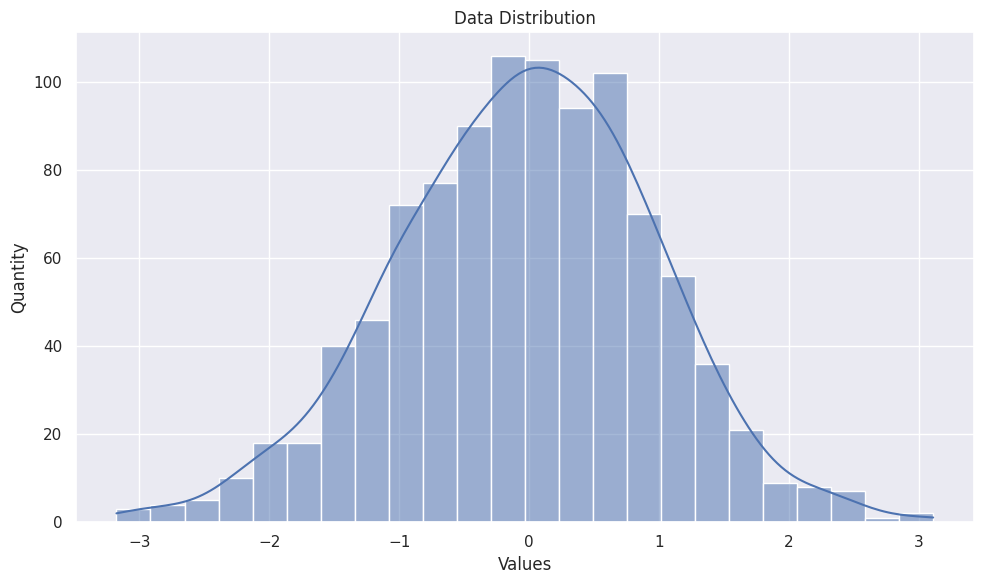

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

data = np.random.randn(1000)
df = pd.DataFrame({'data': data})

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=df['data'], ax=ax, kde=True)

ax.set_xlabel('Values')
ax.set_ylabel('Quantity')
ax.set_title('Data Distribution')

plt.tight_layout()
plt.show()


`Violinplot` в этом случае получится немного другим:

在这种情况下，“Violinplot”会有些不同：

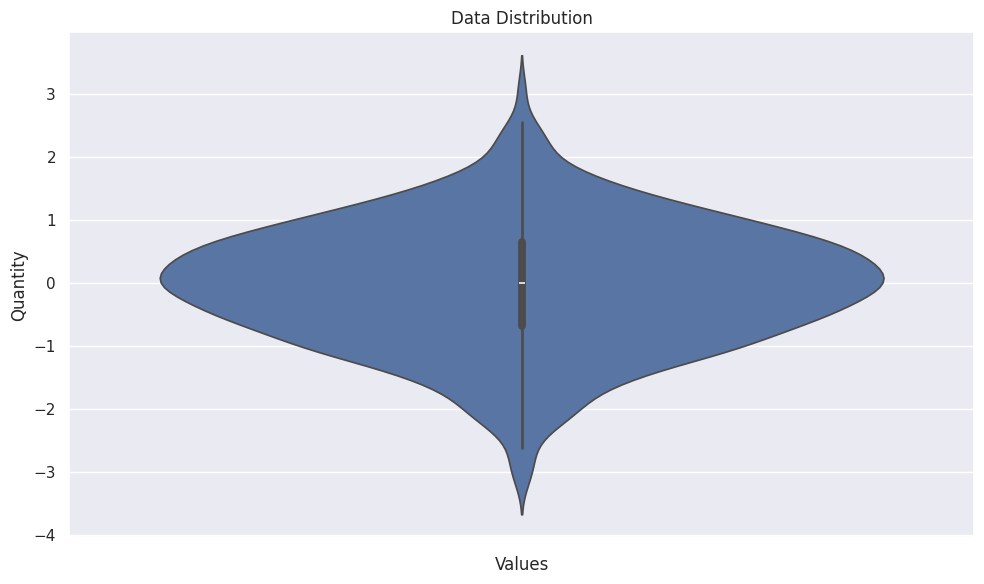

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(data=df['data'], ax=ax)

ax.set_xlabel('Values')
ax.set_ylabel('Quantity')
ax.set_title('Data Distribution')

plt.tight_layout()
plt.show()

А равномерное распределение, к примеру, будет выглядеть так:

例如，均匀分布将如下所示：

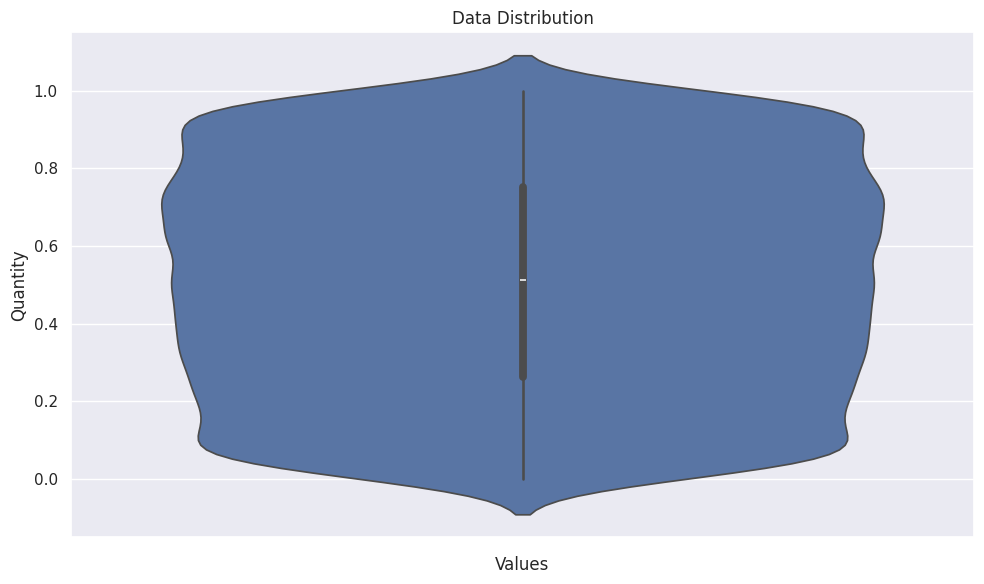

In [25]:
data = np.random.uniform(size=10000)
df = pd.DataFrame({'data': data})

fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(data=df['data'], ax=ax)

ax.set_xlabel('Values')
ax.set_ylabel('Quantity')
ax.set_title('Data Distribution')

plt.tight_layout()
plt.show()

_______________________

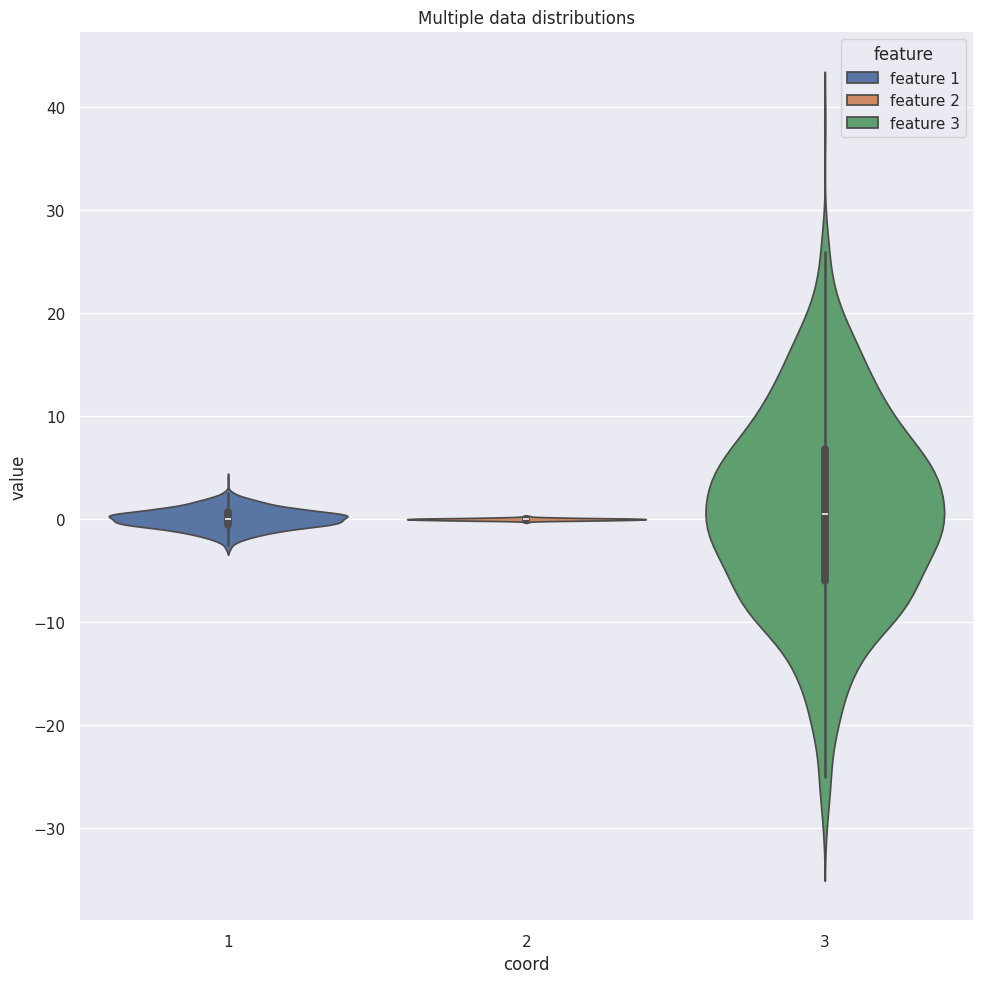

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def draw_violin(x):
    """
    绘制多色菱形图。

    Args:
        x (array-like):具有三列的数据数组。

    Returns:
        None
    """
    df = pd.DataFrame({
        'value': x[:,0].tolist() + x[:,1].tolist() + x[:,2].tolist(),
        'feature': ['feature 1']*1000 + ['feature 2']*1000 + ['feature 3']*1000,
        'coord': [1]*1000 + [2]*1000 + [3]*1000
    })
    plt.figure(figsize=(10,10))
    sns.violinplot(data=df, x='coord', y='value', hue='feature')
    plt.title('Multiple data distributions')
    plt.tight_layout()
    plt.show()

draw_violin(x)


Сейчас, как мы видим, все признаки серьёзно отличаются по масштабу. Применим функцию `scale`:

现在，我们可以看到，所有标志的规模都存在显著差异。让我们应用“scale”函数：

In [28]:
x_scaled = scale(x)
print(x_scaled)

[[-0.25174008  0.31487997 -0.08984652]
 [-1.24177629  1.15008391  0.71728453]
 [ 0.7454714  -0.88731544  1.3850959 ]
 ...
 [ 0.30981985 -1.26829995  0.53306606]
 [ 0.40025919 -1.84081285 -1.24627043]
 [-0.34379362 -0.28317951 -1.29520557]]


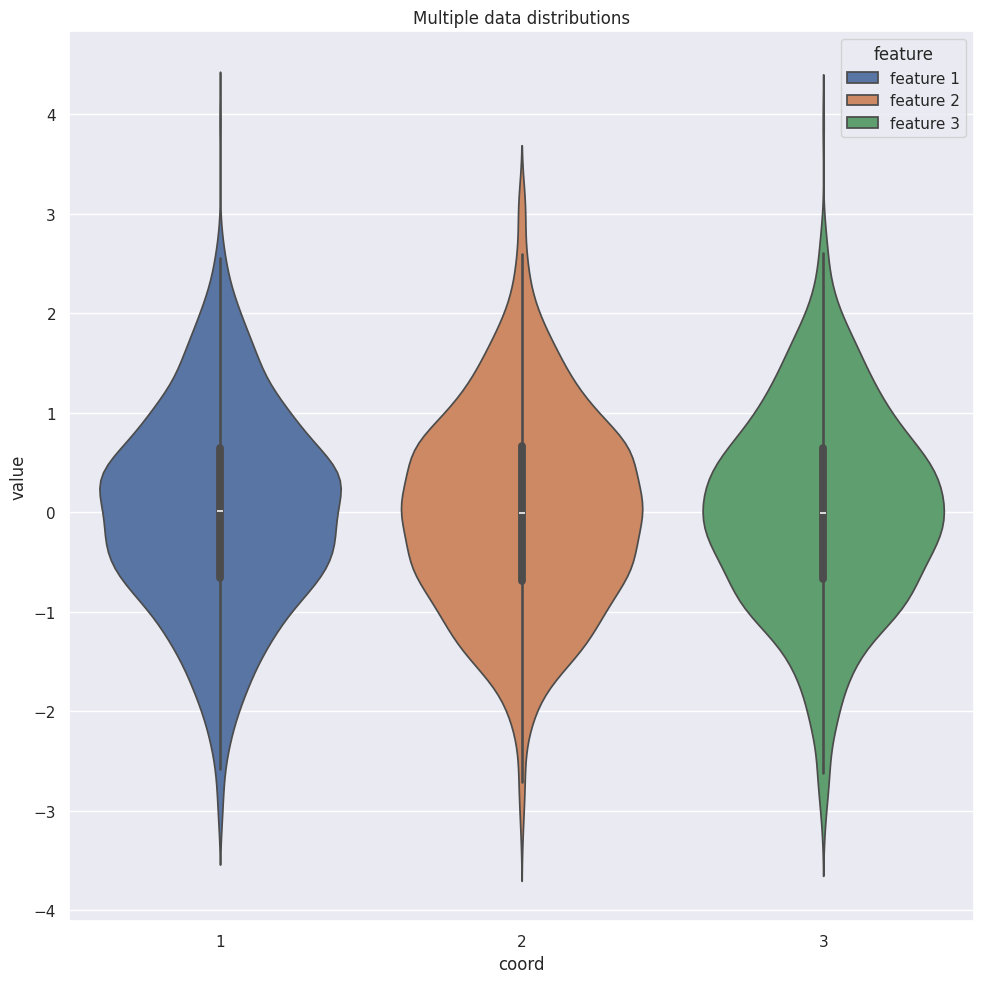

In [29]:
draw_violin(x_scaled)

Как мы видим, все признаки теперь приведены к единой шкале и имеют один и тот же масштаб. Заметьте: средние значения никак не изменились.

Конечно, такая функция есть и в библиотеке `sklearn`.

Рекомендуемая реализация содержится в классе `sklearn.preprocessing.StandardScaler`

Объекты класса `StandardScaler` относятся к т.н. *трансформерам данных*, то есть преобразуют их. В этой связи, они поддерживают функции `.fit()`, `.transform()` и `.fit_transform()`

`.transform` и `.fit_transform` - это полные аналоги `.predict` и `.fit_predict`, используемые в случаях, когда мы вместо решения задачи прогнозирования просто преобразуем каким-либо способом данные. У всех "преобразователей" данных в `sklearn` эти функции реализованы.

我们可以看到，现在所有特征都被带到了单一尺度，并且具有相同的尺度。请注意，平均值根本没有改变。

当然，`sklearn`库中也存在这样的功能。

推荐的实现包含在`sklearn.preprocessing.StandardScaler`类中。

`StandardScaler` 类的对象属于所谓的*数据转换器*，也就是说，它们对数据进行转换。在这方面，它们支持`.fit()`，`.transform()`和`.fit_transform()`函数。

`.transform` 和 `.fit_transform` 是 `.predict` 和 `.fit_predict` 的完全类似物，用于我们不需要解决预测问题而只是以某种方式转换数据的情况。 `sklearn` 中的所有数据“转换器”都实现了这些功能。

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_sk = sc.fit_transform(x)

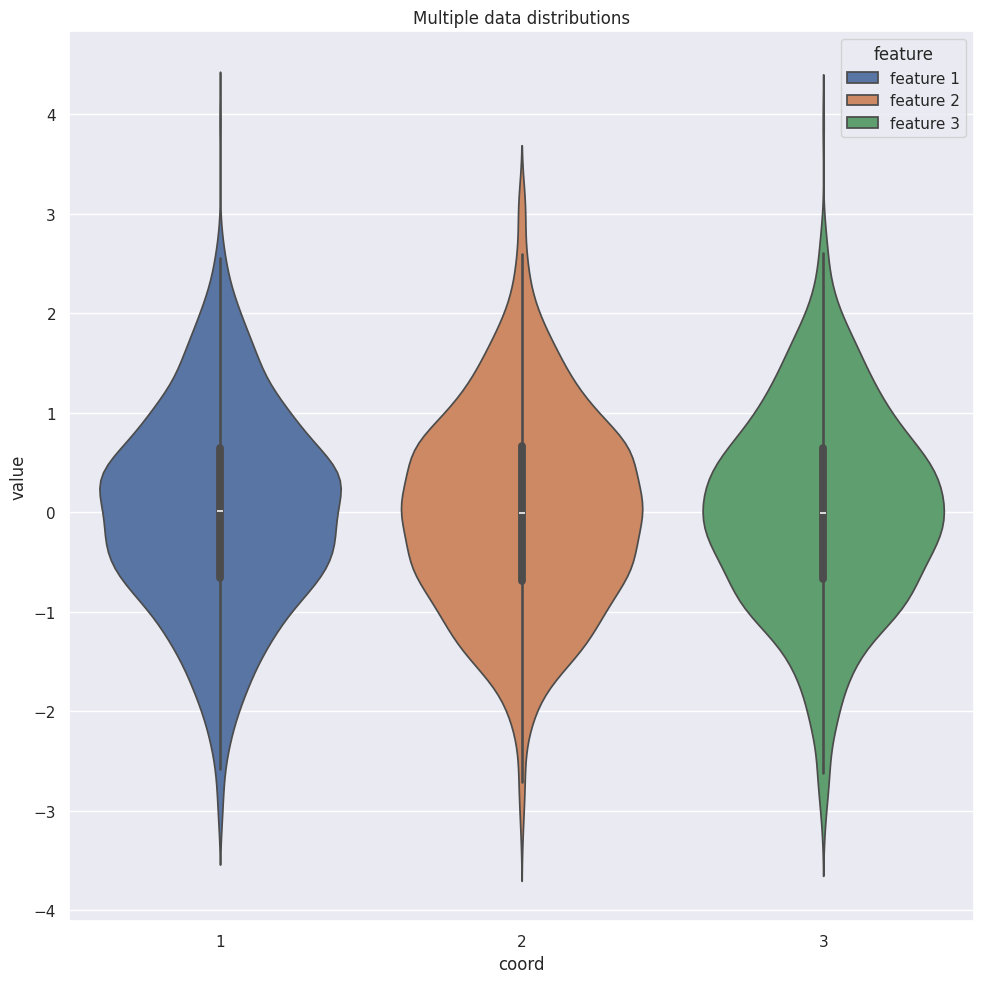

In [31]:
draw_violin(x_sk)

## Датасеты

В `sklearn` есть доступ к некоторому числу готовых классических датасетов. Этот доступ реализован через функции модуля `sklearn.datasets`. Например, через этот модуль можно загрузить классический датасет **ирисов Фишера**, с которым мы уже успели познакомиться.

数据集

`sklearn` 可以访问许多现成的经典数据集。此访问是通过`sklearn.datasets`模块的函数实现的。例如，通过这个模块你可以下载我们已经熟悉的经典数据集**菲舍尔鸢尾花**。

In [32]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

## Работа с моделями

Функции, необходимые для корректной работы с моделями ML, реализованы в `sklearn.model_selection`. Например, функция `train_test_split` реализована именно в этом модуле. В рамках этого модуля можно обратиться и к инструменту проведения перекрёстной валидации.

Метод кросс-валидации реализован в виде функционального блока в библиотеке `sklearn`. Для обращения к функции `cross_val_score` необходимо импортировать её из модуля `sklearn.model_selection`.

`cross_val_score` вернёт нам массив чисел $(score_1 ... score_n)$.

Под $score_i$ здесь подразумевается оценка качества работы алгоритма в случае, когда в качестве тестовой выборки был выбран именно $i$-й "кусок" данных, а остальные вошли в обучающую выборку. Под качеством здесь могут подразумеваться разные метрики, это настраиваемый параметр, но в базовом случае под $score$ подразумевается доля правильных ответов алгоритма.

使用模型

与 ML 模型正确协作所需的功能在 `sklearn.model_selection` 中实现。例如，此模块中实现了`train_test_split`函数。在此模块中，您还可以访问交叉验证工具。

交叉验证方法作为`sklearn`库中的功能块实现。要访问“cross_val_score”函数，您需要从“sklearn.model_selection”模块导入它。

`cross_val_score` 将返回一个数字数组（score_1 ... score_n）。

这里，$score_i$指的是当第$i$“段”数据被选为测试样本，其余数据作为训练样本时，对算法性能的好坏的评估。这里的质量可以表示不同的指标，它是一个可配置的参数，但在基本情况下，$score$ 表示算法正确答案的比例。

Средняя оценка: 0.6755


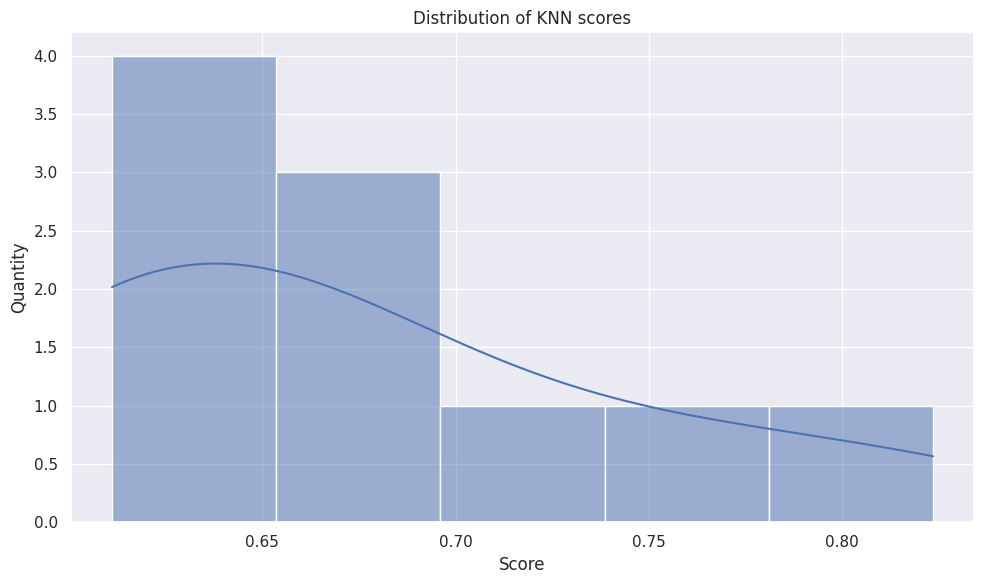

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier

# 加载另一个经典葡萄酒数据集
X, y = load_wine(return_X_y=True)

# 让我们创建一个 KNN 分类器的实例（我们将在下一讲中介绍这一点）
clf = KNeighborsClassifier(n_neighbors=5)

# 让我们进行交叉验证
scores = cross_val_score(clf, X, y, cv=10)

# 让我们得出平均值
print(f"Средняя оценка: {scores.mean():.4f}")

# 让我们推导出评分的分布
plt.figure(figsize=(10, 6))
sns.histplot(scores, kde=True)
plt.title('Distribution of KNN scores')
plt.xlabel('Score')
plt.ylabel('Quantity')
plt.tight_layout()
plt.show()


In [35]:
scores

array([0.66666667, 0.66666667, 0.61111111, 0.61111111, 0.61111111,
       0.61111111, 0.72222222, 0.66666667, 0.82352941, 0.76470588])

In [36]:
scores.mean()

0.6754901960784313

Представленный код нужно интерпретировать следующим образом:

При помощи функции `sklearn.model_selection.crossval` мы разбили выборку на $cv$=5 элементов, и провели описанную выше процедуру для каждого из них, получив 5 оценок качества (по умолчанию выставлена метрика `accuracy_score`). Эти оценки сохранены в массиве `score`.

В аргументы функции `cross_val_score` мы передали:
* объект класса `KNeighborsClassifier (clf)`. В качестве этого аргумента может быть выбран любой классификатор, поддерживающий методы `.fit()`, `.predict()` и (в случае необходимости для соответствующей метрики) `.predict_proba()`. Это функции обучения, предсказания и получения вероятности принадлежности объектов тому или иному классу соответственно. Это очень удобно, потому что позволяет нам использовать в качестве аргумента `clf` не только объекты классов из `sklearn`, но также и из других библиотек (или даже собственные классы).

* обучающую выборку $X$
* ответы к объектам обучающей выборки $y$
* $cv$ - количество "кусочков", на которые мы разбиваем выборку

Подробнее об этой функции можно прочитать в [документации](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html).

提供的代码应解释如下：

使用 `sklearn.model_selection.crossval` 函数，我们将样本分成 $cv$=5 个元素，并对每个元素执行上述过程，获得 5 个质量分数（默认设置 `accuracy_score` 指标）。这些分数存储在“分数”数组中。

我们将以下参数传递给“cross_val_score”函数：
* `KNeighborsClassifier (clf)` 类的对象。任何支持 `.fit()`、`.predict()` 和（如果相应度量需要）`.predict_proba()` 方法的分类器都可以选择作为该参数。这些分别是学习、预测和获取对象属于特定类别的概率的函数。这非常方便，因为它允许我们不仅使用来自“sklearn”的类对象作为参数“clf”，还可以使用来自其他库（甚至我们自己的类）的类对象作为参数“clf”。

* 训练样本$X$
* 对训练样本对象$y$的响应
* $cv$ - 我们将样本分成的“块”的数量

关于此功能的更多详细信息，请参阅[文档](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)。

Этот набор чисел очень о многом нам говорит:

По среднему значению мы можем определить, насколько хорош в среднем наш алгоритм. Именно среднее значение набора метрик, полученных при кросс-валидации, считается валидной оценкой качества построенного алгоритма.

Но здесь есть свои сложности. Представим, что на выходе мы получим следующий набор чисел:

$$[0.5, 0.52, 0.9, 0.55]$$

Средним значением здесь будет 0.61, что, очевидно, связано с аномально хорошим результатом на третьей позиции. Этот результат может быть обусловлен случайностью или смещенностью какой-то из подвыборок. Его нельзя рассматривать как абсолютно корректный. Точно также нас может ввести в заблуждение среднее значение по массиву чисел с очень большим разбросом. Например, если на выходе кросс-валидации мы получим следующий результат:

$$[0.1, 0.99, 0.09, 0.95, 0.94, 0.05]$$

Верить среднему значению здесь, очевидно, нельзя. Следует искать ошибку.
Отследить такие случаи можно при помощи оценки стандартного отклонения в полученном массиве: чем оно меньше, тем оценка качества при помощи усреднения надежнее.

这组数字告诉了我们很多：

从平均值我们可以确定我们的算法的平均水平有多好。交叉验证期间获得的一组指标的平均值被视为对构建算法质量的有效评估。

但这里也存在一些困难。假设输出结果为以下一组数字：

$$[0.5, 0.52, 0.9, 0.55]$$

这里的平均值将是0.61，这显然与第三名的异常好成绩有关。这一结果可能是由于某个子样本的偶然性或偏差造成的。这不能被认为是绝对正确的。同样，我们也可能被一系列数值差异很大的数字的平均值所误导。例如，如果我们得到以下结果作为交叉验证的输出：

$$[0.1, 0.99, 0.09, 0.95, 0.94, 0.05]$$

显然，你不能相信这里的平均值。应该寻找错误。
可以通过评估结果数组中的标准差来跟踪这种情况：标准差越小，使用平均值进行的质量评估就越可靠。

## Pipeline

В `sklearn` существует удобный инструмент для оптимизации всего изложенного кода. Дело в том, что стандартная задача машинного обучения имеет довольно предсказуемый ход решения: применения ряда преобразований к данным, обучение некоторого классификатора, вычисление метрики качества. Для упрощения этой процедуры разработан класс `Pipeline`.

管道

`sklearn` 有一个方便的工具，可以优化提供的所有代码。关键在于，标准机器学习任务具有相当可预测的解决路径：对数据应用一系列转换、训练分类器并计算质量指标。为了简化这个过程，我们开发了“Pipeline”类。

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# 加载数据集
X, y = load_wine(return_X_y=True)

# 拆分训练和测试
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

# 创建管道并进行训练
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])
pipe.fit(X_train, y_train)

# 模型评估
score = pipe.score(X_test, y_test)

print(f"模型评估: {score:.4f}")
print(f"错误率: {sum(pipe.predict(X_test) != y_test) / len(y_test):.4f}")

模型评估: 0.9630
错误率: 0.0370
